# Importando base de dados

In [48]:
import pandas as pd


In [49]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [50]:
dados = pd.read_csv('tips.csv')

In [51]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução 

In [52]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [53]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert': 'sobremesa',
            'day':'dia_da_semana',
            'time': 'hora_do_dia',
            'size': 'total_de_pessoa'}


In [54]:
type(dados)

pandas.core.frame.DataFrame

In [55]:
gorjetas = dados.rename(columns = renomear)

In [56]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Verificar os tipos de array dentro da coluna

In [57]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [58]:
sim_nao = {
'No' : 'Não',
'Yes' : 'Sim'
}

In [59]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [60]:
gorjetas.sobremesa =  gorjetas.sobremesa.map(sim_nao)

In [61]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Sun,Dinner,2


In [62]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [63]:
dias = {'Sun': 'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'}


In [64]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [65]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [66]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [67]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [68]:
hora = {'Dinner':'Jantar', 'Lunch':'Almoço'}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [69]:
gorjetas.head(4)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2


## O que aprendemos
Documentação Pandas: https://pandas.pydata.org/pandas-docs/stable/

## Principais comandos do pandas

Para importar o pandas segundo a convenção : **import pandas as pd**

Ler um arquivo do tipo csv chamado tips : **pd.read_csv('tips.csv')**

Exibir as 5 primeiras linhas do DataFrame : **tips.head()**

Exibir as 5 ultimas linhas do DataFrame : **tips.tail()**

Listar as colunas presentes no DataFrame : **tips.columns**

Exibir a quantidade de linhas e colunas presentes no DataFrame : **tips.shape**

Deletar uma coluna do DataFrame : **tips.drop('day', axis=1)**


# Comparando distribuições de maneira exploratória

## Importando Seaborn

In [70]:
!pip install matplotlib
!pip install numpy
!pip install seaborn --upgrade

In [71]:
import matplotlib as plt
import numpy as np
import seaborn as sns


## Análise 1 - Valor da conta e gorjeta

In [72]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()


A base de dados contém 244 registros 

Registros não nulos


valor_da_conta     244
gorjeta            244
sobremesa          244
dia_da_semana      244
hora_do_dia        244
total_de_pessoa    244
dtype: int64

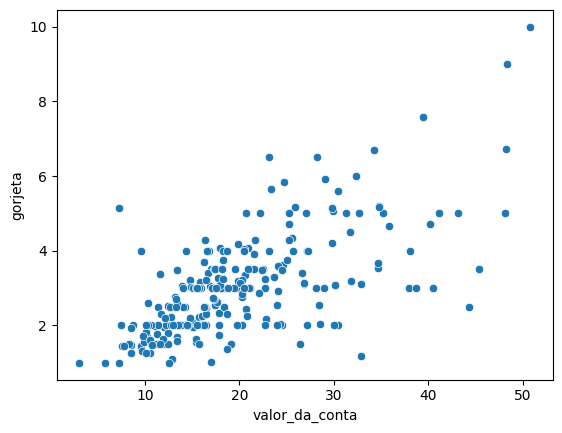

In [73]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o aumenta o valor da conta.**


## Criando o campo porcentagem %

In [74]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [75]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [76]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


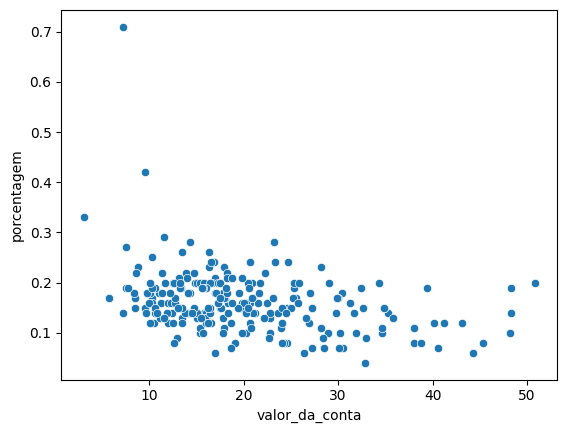

In [77]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [89]:
!pip install   seaborn==0.12.2


**Visualmente, o valor da conta não está aumentando com o valor da gorjeta.**

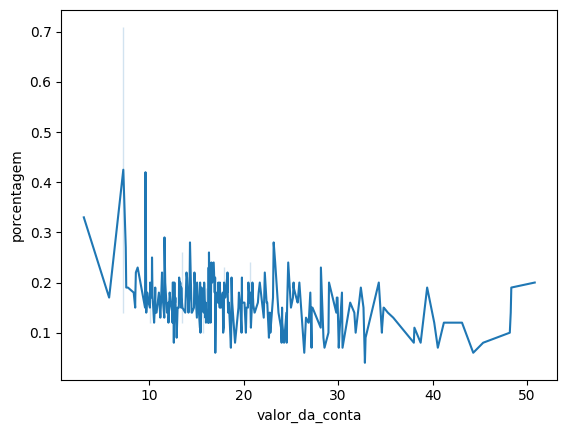

In [92]:
porcentagem_conta_linha = sns.lineplot(x='valor_da_conta', y='porcentagem', data=gorjetas)


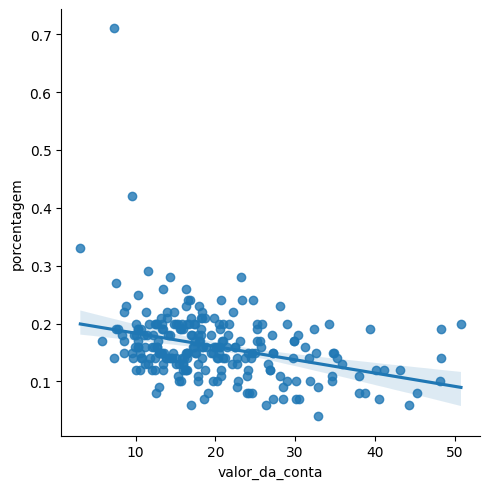

In [93]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Analisando de forma visual e descritiva

## Análise 2 -Sobremesa

In [94]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [99]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [100]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


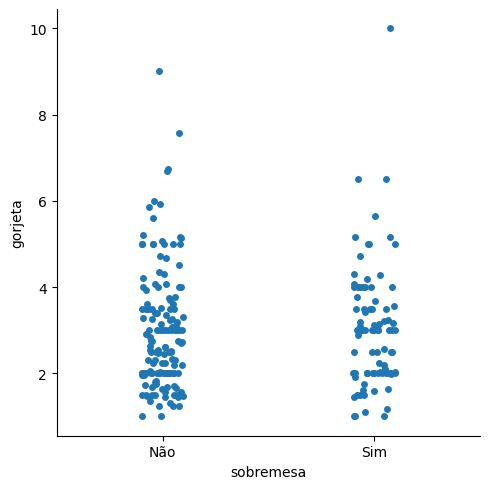

In [102]:
sns.catplot(x='sobremesa',y='gorjeta', data = gorjetas)

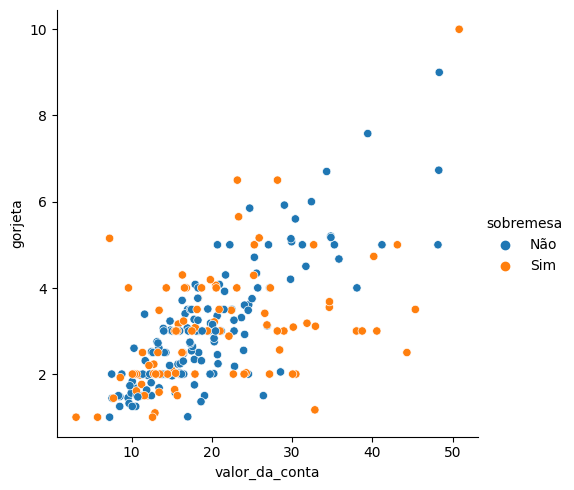

In [104]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

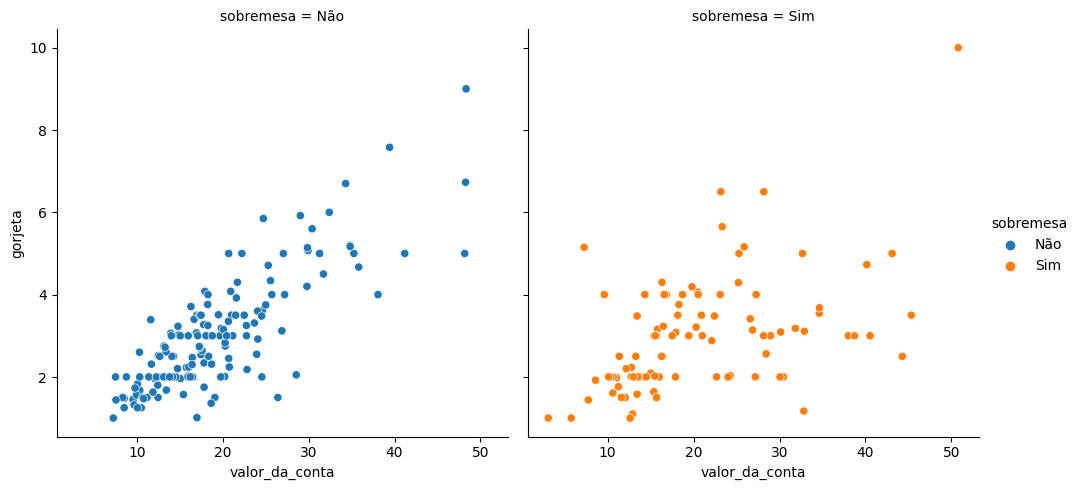

In [106]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)


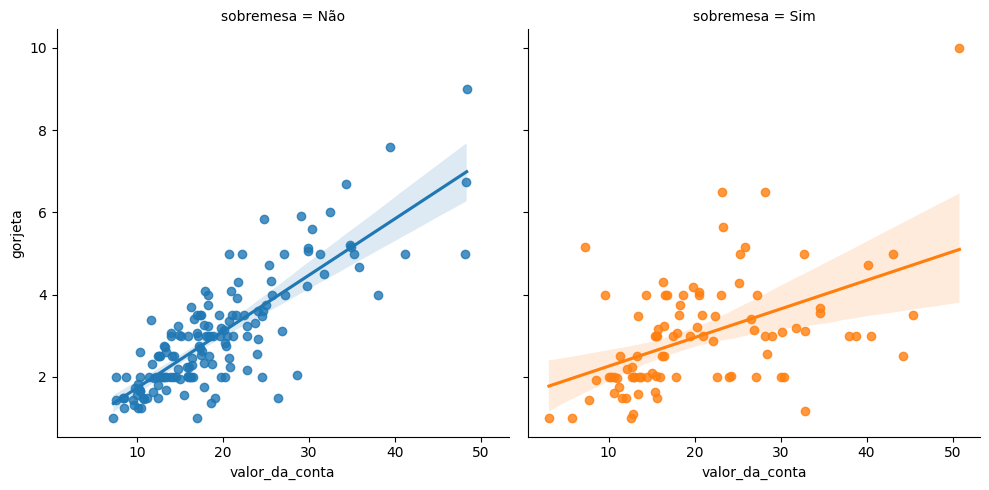

In [107]:
sns.lmplot(x='valor_da_conta', y='gorjeta',
            hue='sobremesa', col='sobremesa', data=gorjetas)


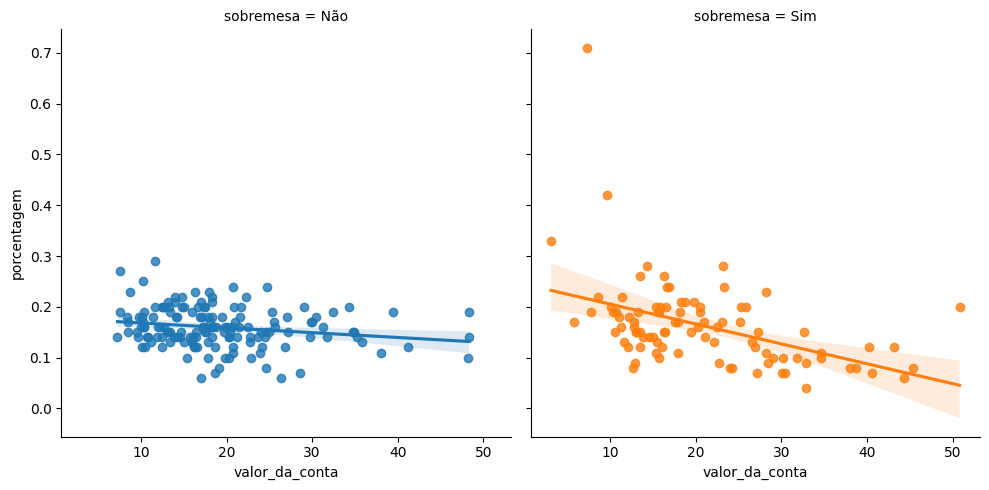

In [108]:
sns.lmplot(x='valor_da_conta', y='porcentagem',
           hue='sobremesa', col='sobremesa', data=gorjetas)


<Axes: xlabel='valor_da_conta', ylabel='gorjeta'>

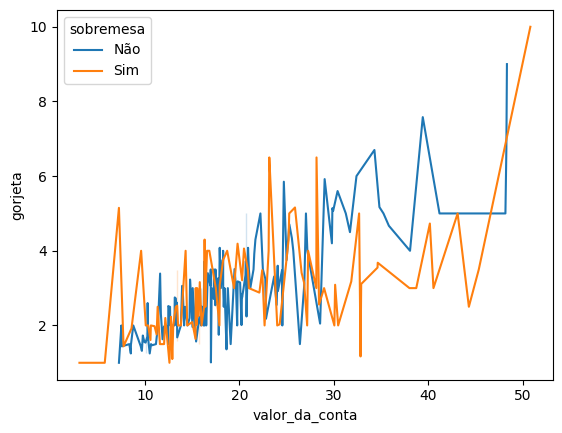

In [116]:
sns.lineplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)


**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de Hipótes

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [117]:
from scipy.stats import ranksums

In [119]:
sobremesa = gorjetas.query("sobremesa =='Sim'").porcentagem

In [120]:
sem_sobremesa = gorjetas.query("sobremesa =='Não'").porcentagem

In [122]:
r = ranksums(sobremesa, sem_sobremesa)

In [123]:
print('O Valor do p-value é {}'.format(r.pvalue))

O Valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Comparando e explorando os dias da semana

## Analise 3 -  Dias da Semana

In [124]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [125]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

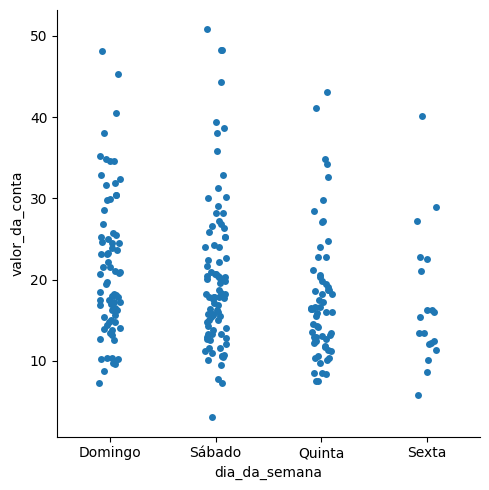

In [126]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data=gorjetas)

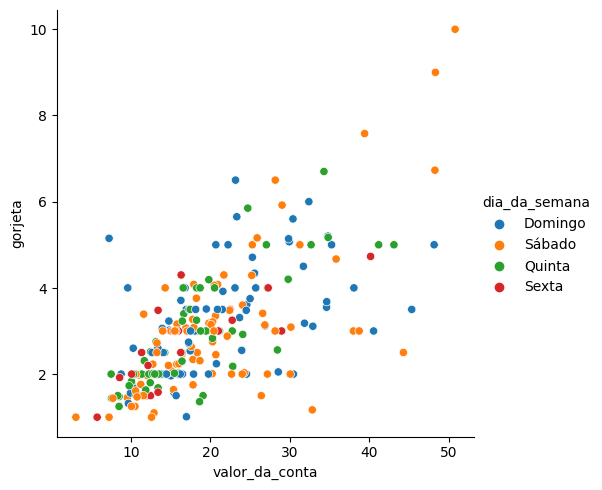

In [129]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

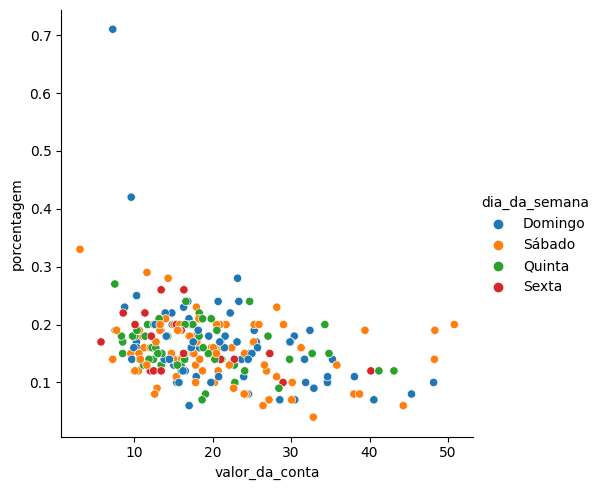

In [130]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', data=gorjetas)

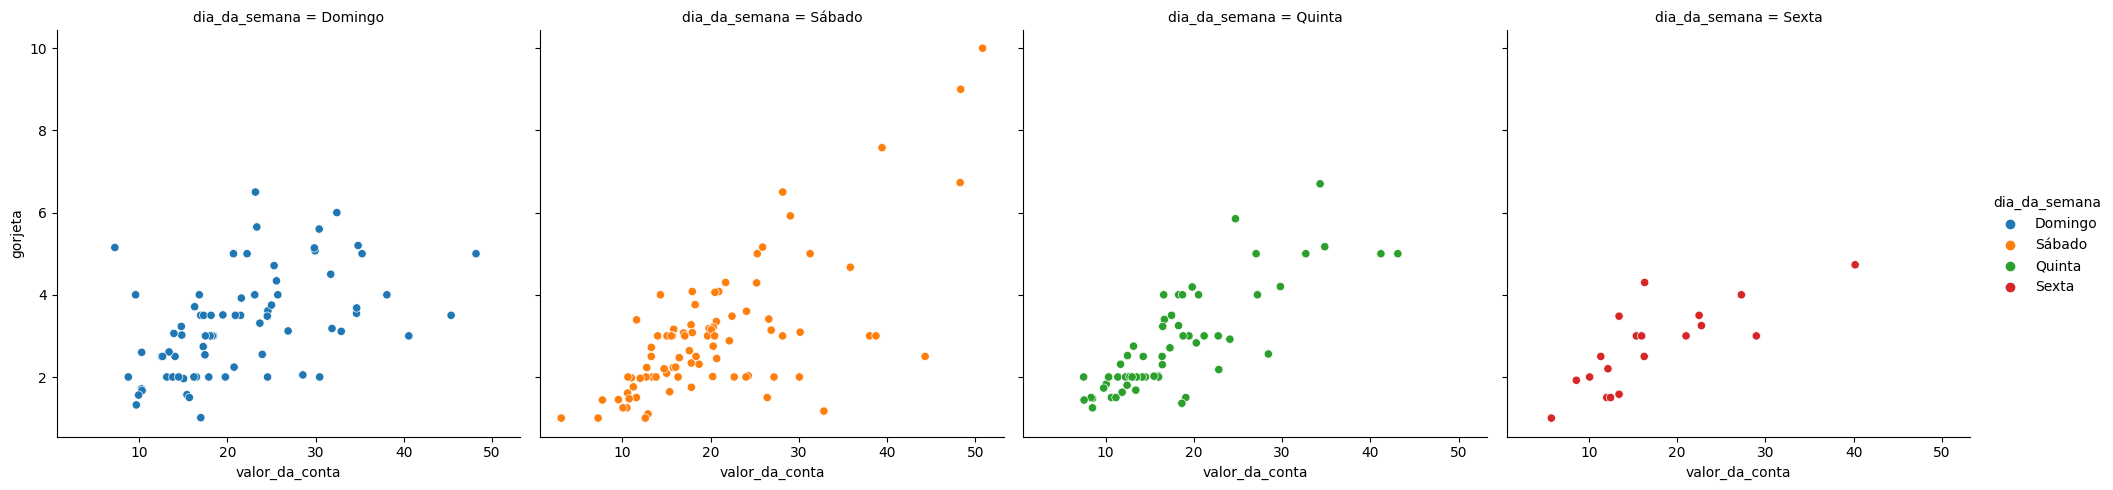

In [132]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

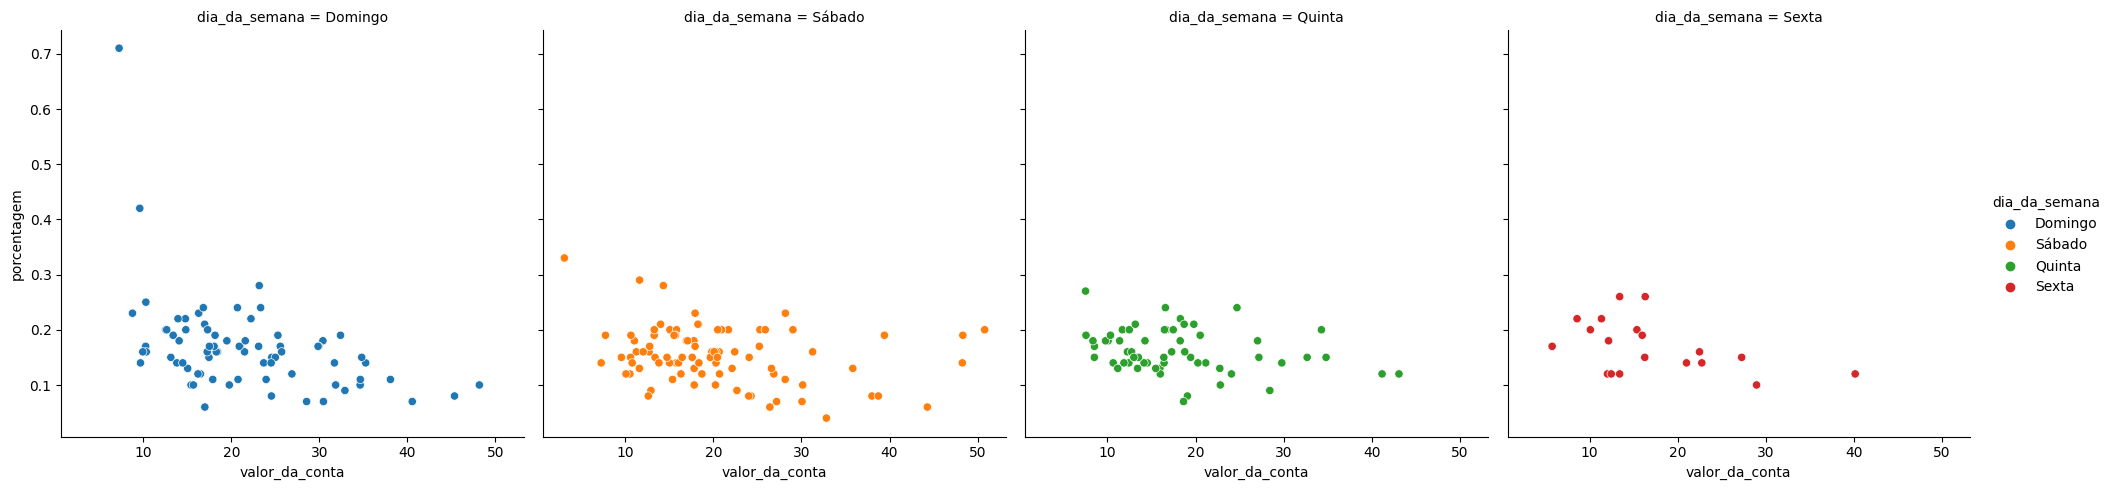

In [133]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

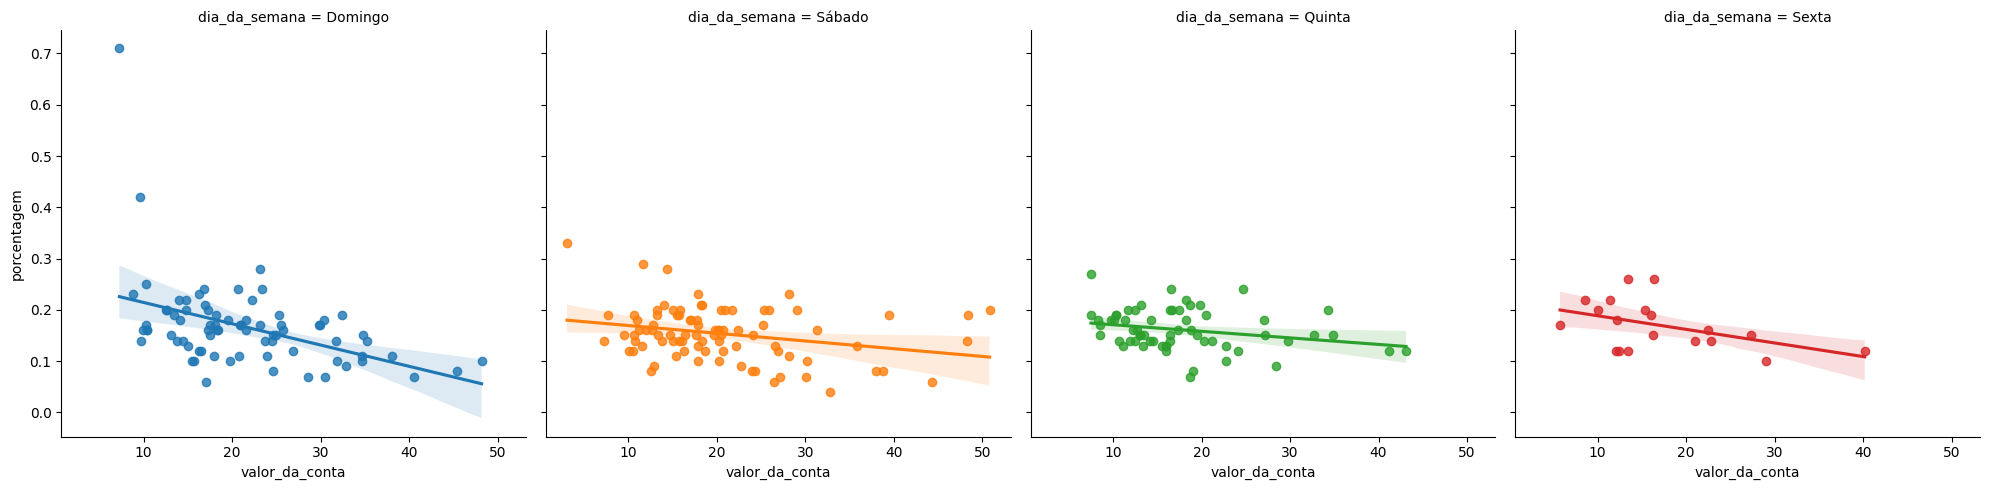

In [135]:
sns.lmplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [138]:
media_geral_gorjetas =  gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}' .format(media_geral_gorjetas))


A média geral das gorjetas é de 2.99827868852459


In [143]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

C:\Users\ppvne\AppData\Local\Temp\ipykernel_19236\1902246177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [145]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [146]:
valor_conta_domingo = gorjetas.query("dia_da_semana =='Domingo'").valor_da_conta

In [147]:
valor_conta_sabado = gorjetas.query("dia_da_semana =='Sábado'").valor_da_conta

In [151]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

# Distribuição de frequência e teste de hipótese

# Análise 4 - Hora do Dia

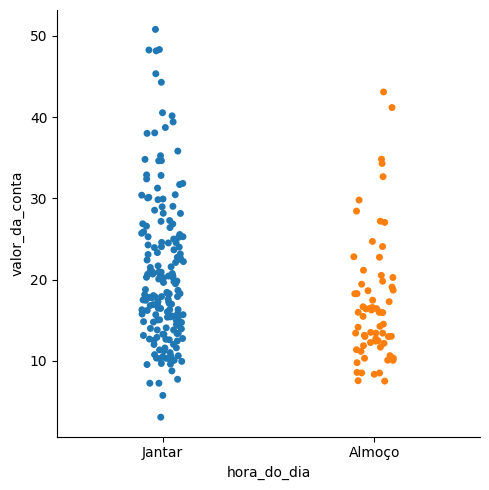

In [154]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", hue="hora_do_dia", data=gorjetas)


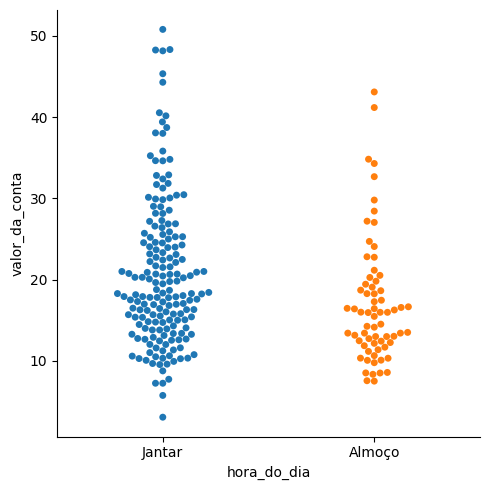

In [156]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", kind='swarm',
            hue="hora_do_dia", data=gorjetas)


<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

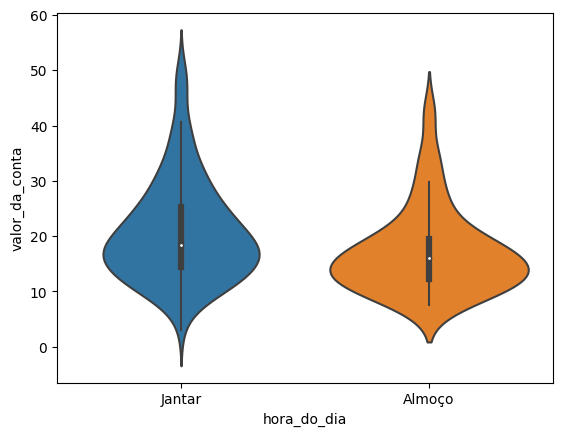

In [157]:
sns.violinplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)


<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

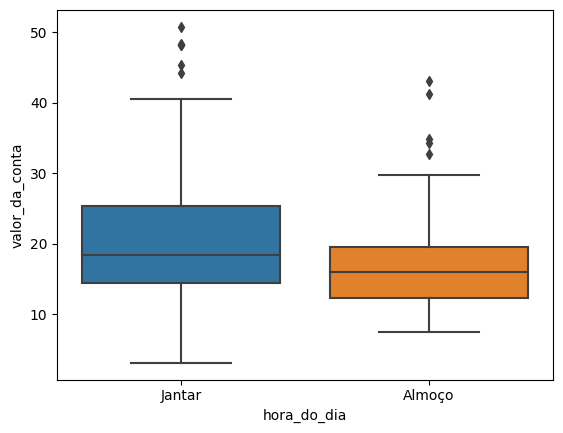

In [158]:
sns.boxplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)


In [160]:
almoço = gorjetas.query("hora_do_dia =='Almoço'").valor_da_conta

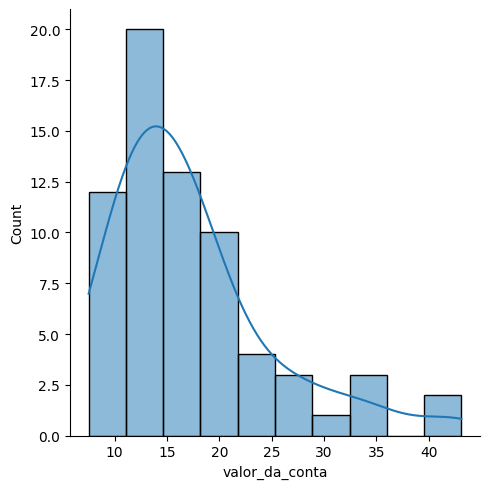

In [166]:
sns.displot(almoço,kde=True)

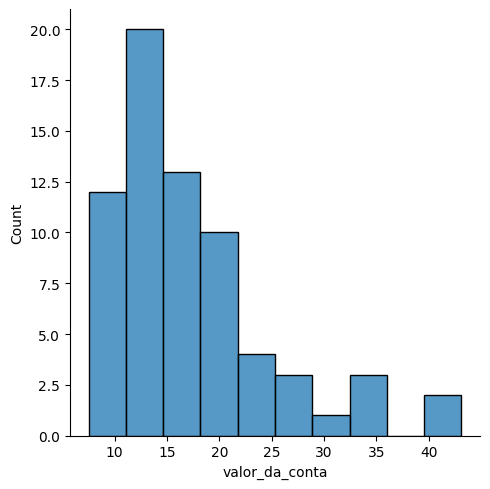

In [167]:
sns.displot(almoço,kde=False)

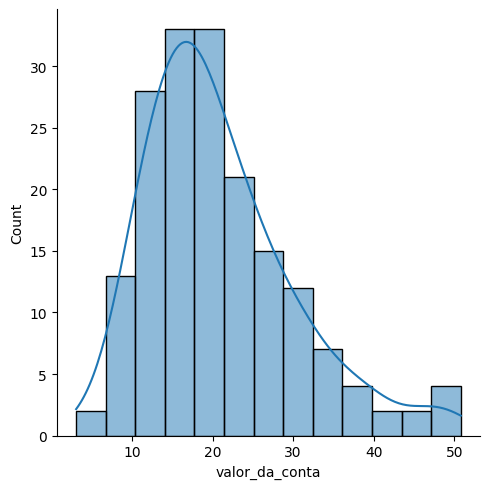

In [170]:
jantar = gorjetas.query("hora_do_dia =='Jantar'").valor_da_conta
sns.displot(jantar,kde=True)

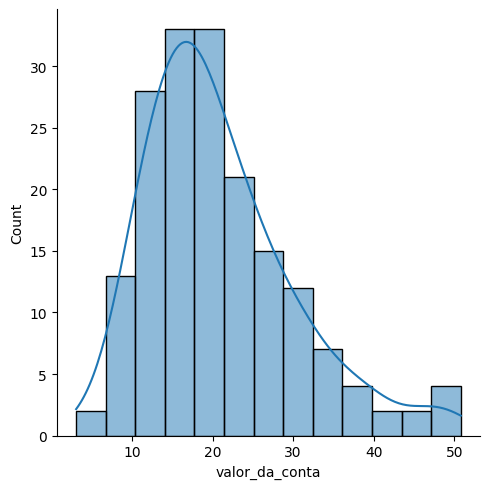

In [171]:
sns.displot(jantar,kde=True)

C:\Users\ppvne\AppData\Local\Temp\ipykernel_19236\1714704720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [178]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


C:\Users\ppvne\AppData\Local\Temp\ipykernel_19236\28598303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [181]:
r2=ranksums(jantar, almoço)
print('Valor do p-valeu é de {}'.format(r2.pvalue))

Valor do p-valeu é de 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**